<a href="https://colab.research.google.com/github/srivatsan88/YouTubeLI/blob/master/OCR_%2B_Translate_%2B_TTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Link](https://drive.google.com/uc?id=1ulYLIj5XhDhuFjtRpqhJklxQu-j4NYqL)

In [ ]:
!pip install easyocr

     |████████████████████████████████| 57.2MB 62kB/s 


In [ ]:
!pip install googletrans

     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 983kB 36.3MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 
     |████████████████████████████████| 61kB 10.7MB/s 
     |████████████████████████████████| 102kB 13.1MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=fbb300b0bd20250fa9309650941c2aa6815bb85c1373bdc21b7a55d484dea652
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=15366dbc7415b968a21dfa5e7b798e6df6b6d2d022307c74edd0ed81c1cdd906
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
!pip install gTTS

In [ ]:
!wget https://i.stack.imgur.com/mk1jX.jpg

--2020-12-07 13:58:50--  https://i.stack.imgur.com/mk1jX.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 104.16.29.34, 104.16.25.34, 104.16.2.35, ...
Connecting to i.stack.imgur.com (i.stack.imgur.com)|104.16.29.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45178 (44K) [image/jpeg]
Saving to: ‘mk1jX.jpg’

mk1jX.jpg           100%[===================>]  44.12K  --.-KB/s    in 0.001s  

2020-12-07 13:58:50 (80.3 MB/s) - ‘mk1jX.jpg’ saved [45178/45178]



In [ ]:
from googletrans import Translator
import easyocr
from gtts import gTTS
from IPython.display import Audio

In [ ]:
reader = easyocr.Reader(['ta'])
translator = Translator()

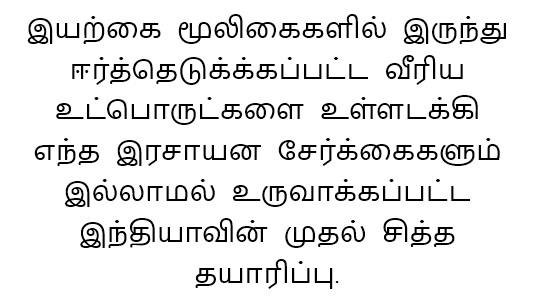

In [ ]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open("mk1jX.jpg")
im

In [ ]:
bounds = reader.readtext('mk1jX.jpg', add_margin=0.55, width_ths=0.7, link_threshold=0.8, decoder='beamsearch',blocklist='=-')
bounds

[([[32, 0], [532, 0], [532, 70], [32, 70]],
  'இயற்கை மூலிகைகளில் இருந்து',
  0.18822869658470154),
 ([[49, 29], [489, 29], [489, 110], [49, 110]],
  'ஈர்த்தெடுக்க்கப்பட்ட வீரிய',
  0.032601237297058105),
 ([[38, 77], [324, 77], [324, 146], [38, 146]],
  'உட்பொருட்களை ',
  0.18306025862693787),
 ([[304, 78], [496, 78], [496, 140], [304, 140]],
  'உள்ளடக்கி',
  0.45306336879730225),
 ([[14, 118], [523, 118], [523, 188], [14, 188]],
  'எந்த இரசாயன சேர்க்கைகளும்',
  0.054485440254211426),
 ([[71, 156], [491, 156], [491, 229], [71, 229]],
  'இல்லாமல் உருவாக்கப்பட்ட',
  0.6472398042678833),
 ([[60, 195], [478, 195], [478, 272], [60, 272]],
  'இந்தியாவின் முதல் சித்த',
  0.4297100007534027),
 ([[174, 237], [359, 237], [359, 303], [174, 303]],
  'தயாரிப்பு',
  0.15375258028507233)]

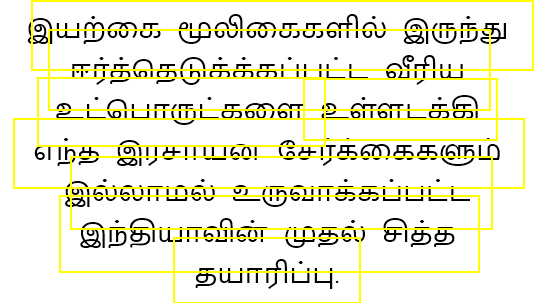

In [ ]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

In [ ]:
text_list = reader.readtext('mk1jX.jpg', add_margin=0.55, width_ths=0.7, link_threshold=0.8, decoder='beamsearch',blocklist='=-', detail=0)
text_list

['இயற்கை மூலிகைகளில் இருந்து',
 'ஈர்த்தெடுக்க்கப்பட்ட வீரிய',
 'உட்பொருட்களை ',
 'உள்ளடக்கி',
 'எந்த இரசாயன சேர்க்கைகளும்',
 'இல்லாமல் உருவாக்கப்பட்ட',
 'இந்தியாவின் முதல் சித்த',
 'தயாரிப்பு']

In [ ]:
text_comb=' '.join(text_list)
text_comb

'இயற்கை மூலிகைகளில் இருந்து ஈர்த்தெடுக்க்கப்பட்ட வீரிய உட்பொருட்களை  உள்ளடக்கி எந்த இரசாயன சேர்க்கைகளும் இல்லாமல் உருவாக்கப்பட்ட இந்தியாவின் முதல் சித்த தயாரிப்பு'

In [ ]:
print(translator.detect(text_comb))

AttributeError: ignored

In [ ]:
text_en=translator.translate(text_comb, src='ta')
print(text_en.text)

India's first paranormal product made without any chemical additives containing active ingredients extracted from natural herbs


In [ ]:
ta_tts=gTTS(text_en.text)
ta_tts.save('trans.mp3')

In [ ]:
Audio('trans.mp3' , autoplay=True)

In [ ]:
ta_tts=gTTS(text_en.text, lang='ja')
ta_tts.save('trans.mp3')

In [ ]:
Audio('trans.mp3' , autoplay=True)

In [ ]:
text_hi=translator.translate(text_comb, src='ta',dest='hi')
print(text_hi.text)

प्राकृतिक जड़ी बूटियों से निकाले गए सक्रिय तत्वों से युक्त किसी भी रासायनिक योजक के बिना भारत का पहला असाधारण उत्पाद


In [ ]:
ta_tts_hi=gTTS(text_hi.text, lang='hi')
ta_tts_hi.save('trans_hi.mp3')

In [ ]:
Audio('trans_hi.mp3' , autoplay=True)

In [ ]:
text_fr=translator.translate(text_comb, src='ta',dest='fr')
print(text_fr.text)

Le premier produit paranormal de l'Inde fabriqué sans aucun additif chimique contenant des ingrédients actifs extraits d'herbes naturelles


In [ ]:
ta_tts_fr=gTTS(text_fr.text, lang='fr')
ta_tts_fr.save('trans_fr.mp3')

In [ ]:
Audio('trans_fr.mp3' , autoplay=True)